In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
diagnosis_df = pd.read_csv('/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv',header=None, names=['patient_id', 'disease'])

diagnosis_df.head()

,patient_id,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [3]:
print(diagnosis_df.disease.value_counts())
print('')
print(diagnosis_df.disease.value_counts(normalize=True)*100)

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: disease, dtype: int64

COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: disease, dtype: float64


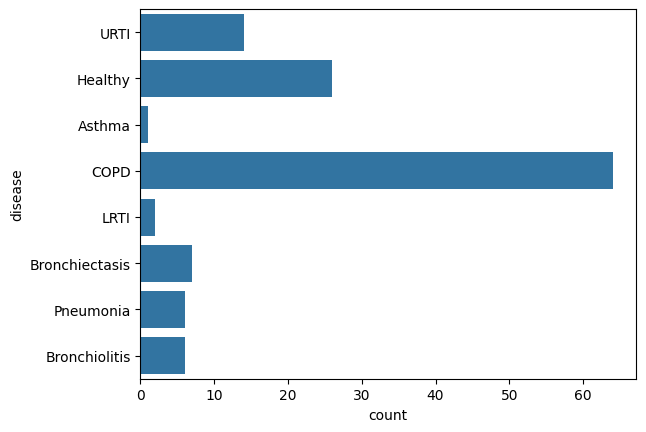

In [4]:
sns.countplot(diagnosis_df.disease)
plt.show()

In [5]:
path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
files = [s.split('.')[0] for s in os.listdir(path) if '.txt' in s]

In [6]:
files[:10]

['160_1b3_Ar_mc_AKGC417L',
 '160_1b4_Ar_mc_AKGC417L',
 '160_1b3_Pr_mc_AKGC417L',
 '160_1b4_Al_mc_AKGC417L',
 '160_1b3_Tc_mc_AKGC417L',
 '160_2b4_Pr_mc_AKGC417L',
 '160_2b4_Ar_mc_AKGC417L',
 '160_1b4_Tc_mc_AKGC417L',
 '160_1b4_Lr_mc_AKGC417L',
 '160_1b4_Pr_mc_AKGC417L']

In [7]:
def extract_patient_id(filename):
    return filename.split('_')[0]
length=len(files)
index=range(length)
i=0
patient_df=pd.DataFrame(index=index,columns=['patient_id','filename'])
for f in files:
    patient_df.iloc[i]['patient_id']=extract_patient_id(f)
    patient_df.iloc[i]['filename']=f
    i+=1

patient_df.head()

,patient_id,filename
0,160,160_1b3_Ar_mc_AKGC417L
1,160,160_1b4_Ar_mc_AKGC417L
2,160,160_1b3_Pr_mc_AKGC417L
3,160,160_1b4_Al_mc_AKGC417L
4,160,160_1b3_Tc_mc_AKGC417L


In [8]:
import glob
directory_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
text_files = glob.iglob(path + '/*.txt', recursive=True)
text_files_list = list(text_files)

dfs = []
for file in text_files_list:

    content = pd.read_csv(file, names = ["start_time", "end_time", "crackles", "wheezes"], delimiter = "\t")
    patient_number = file.split("_")[7][6:]
    content['patient'] = int(patient_number)
    dfs.append(content)
samples = pd.concat(dfs)

print("There are", len(samples), "cycles")
print("There are", len(text_files_list), "samples")

There are 6898 cycles
There are 920 samples


In [9]:
# 텍스트 파일 읽기
diagnosis_df = pd.read_csv('/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv', sep='\t', header=None, names=['patient_id', 'disease'])

In [10]:
label_file_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_2b4_Ll_mc_AKGC417L.txt'
# 텍스트 파일 읽기
label_data_list = pd.read_csv(label_file_path, sep='\t', header=None, names=['Beginning of respiratory', 'End of respiratory','crackles','wheezes'])

In [11]:
data_list = label_data_list.to_dict('records')
print(data_list)

[{'Beginning of respiratory': 0.338, 'End of respiratory': 1.399, 'crackles': 0, 'wheezes': 0}, {'Beginning of respiratory': 1.399, 'End of respiratory': 3.768, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 3.768, 'End of respiratory': 5.875, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 5.875, 'End of respiratory': 8.173, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 8.173, 'End of respiratory': 10.542, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 10.542, 'End of respiratory': 12.673, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 12.673, 'End of respiratory': 15.042, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 15.042, 'End of respiratory': 17.244, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 17.244, 'End of respiratory': 19.426, 'crackles': 1, 'wheezes': 0}]


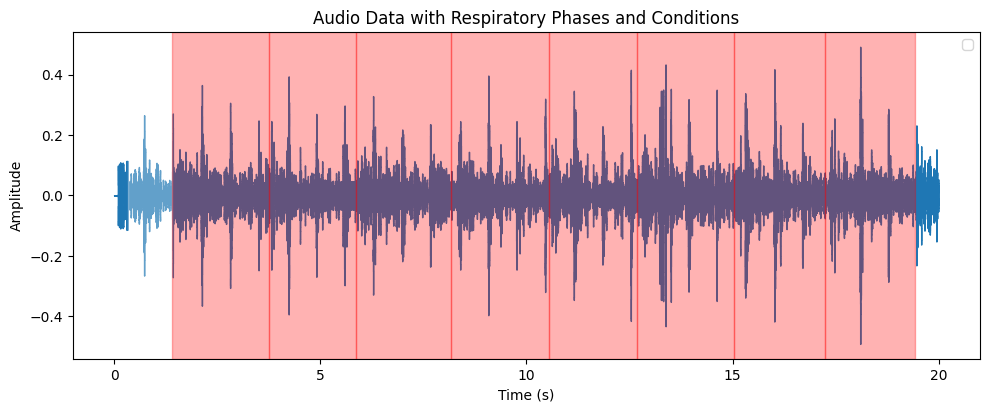

In [12]:
# 오디오 파일 로딩
wav_file_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_2b4_Ll_mc_AKGC417L.wav'  # 오디오 파일 경로
y, sr = librosa.load(wav_file_path, sr=4000)  # y는 오디오 신호, sr은 샘플링 레이트

# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]
    end = entry["End of respiratory"]
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    # 사각형 영역 표시
    plt.axvspan(start, end, color=color, alpha=0.3)

plt.legend()
plt.title('Audio Data with Respiratory Phases and Conditions')
plt.show()

###Mel-Spectogram

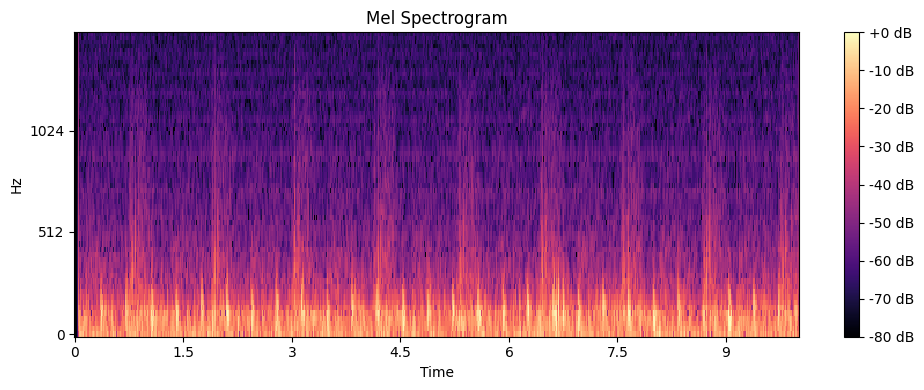

In [13]:
# 예제 오디오 신호 'y'와 샘플링 레이트 'sr' 가정
# y, sr = librosa.load(audio_path, sr=sample_rate)

# 주어진 설정 값
sample_rate = 8000  # 샘플링 레이트
desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 256  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2000  # 최대 주파수

# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

In [14]:
from IPython.display import Audio

# 노이즈가 제거된 오디오 재생
Audio(data=y, rate=sr)

In [15]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut,fs, order=5):
    nyq= 0.5*fs
    low= lowcut/nyq
    high= highcut/nyq
    b,a = butter(order, [low,high], btype='band')
    return b,a

def butter_bandpass_filter(data, lowcut,highcut, fs, order=5):
    b,a= butter_bandpass( lowcut, highcut, fs, order)
    y=lfilter(b,a,data)
    return y

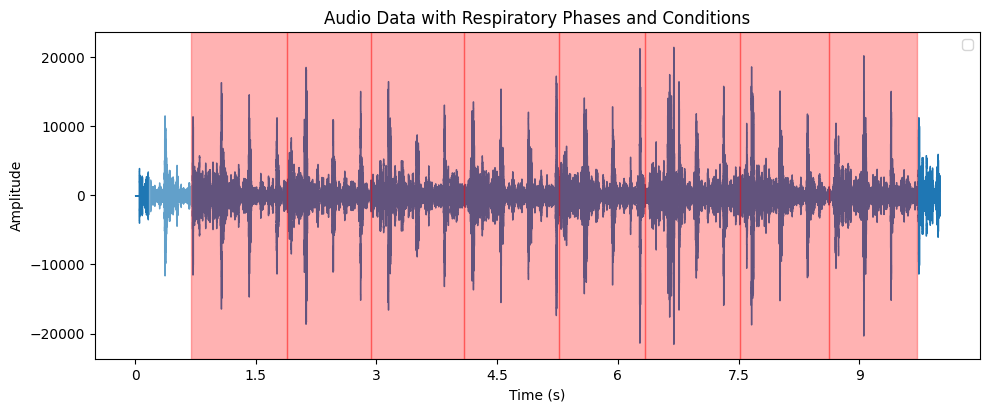

In [16]:
# 오디오 파일 로딩
wav_file_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/130_2b4_Ll_mc_AKGC417L.wav'  # 오디오 파일 경로
y2, sr = librosa.load(wav_file_path, sr=8000)  # y는 오디오 신호, sr은 샘플링 레이트
audio = y * (2 ** 15 - 1) / np.max(np.abs(y))
y2 = butter_bandpass_filter(audio, 100,520, sr, 3)

# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y2, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]/2
    end = entry["End of respiratory"]/2
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    # 사각형 영역 표시
    plt.axvspan(start, end, color=color, alpha=0.3)

plt.legend()
plt.title('Audio Data with Respiratory Phases and Conditions')
plt.show()

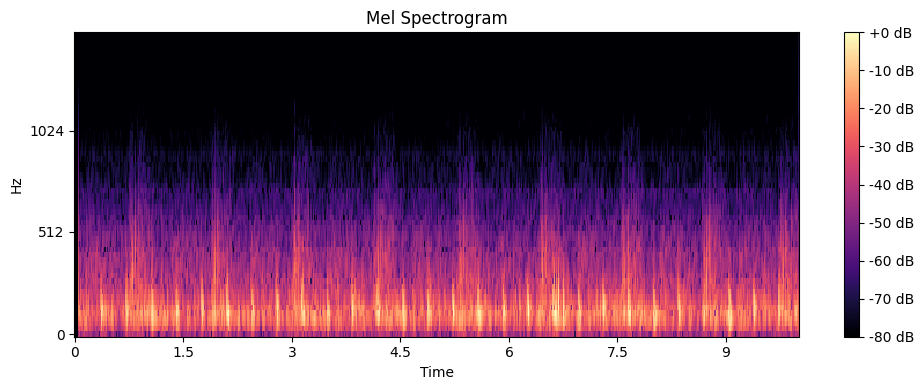

In [17]:
# 주어진 설정 값
sample_rate = 8000  # 샘플링 레이트
desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 256  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2000  # 최대 주파수

# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y2, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')

plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

<ipython-input-32-5f5e09583f7d>:33: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=0.3)


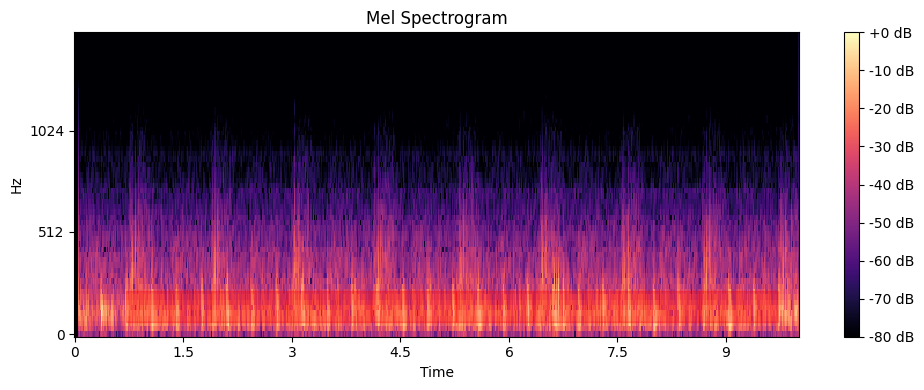

In [32]:
# 주어진 설정 값
sample_rate = 8000  # 샘플링 레이트
desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 256  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2000  # 최대 주파수

# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y2, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')


# {'Beginning of respiratory': 0.042, 'End of respiratory': 1.28, 'crackles': 0, 'wheezes': 1}

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]/2
    end = entry["End of respiratory"]/2
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles:
        color = 'red'  # crackles만 1일 경우
        ymin = 100/f_max
        ymax = 300/f_max

        plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=0.3)

    if wheezes:
        color = 'blue'  # wheezes만 1일 경우
        ymin = 100/f_max
        ymax = 1800/f_max

    # 사각형 영역 표시
        plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=0.3)

plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

###MFCC

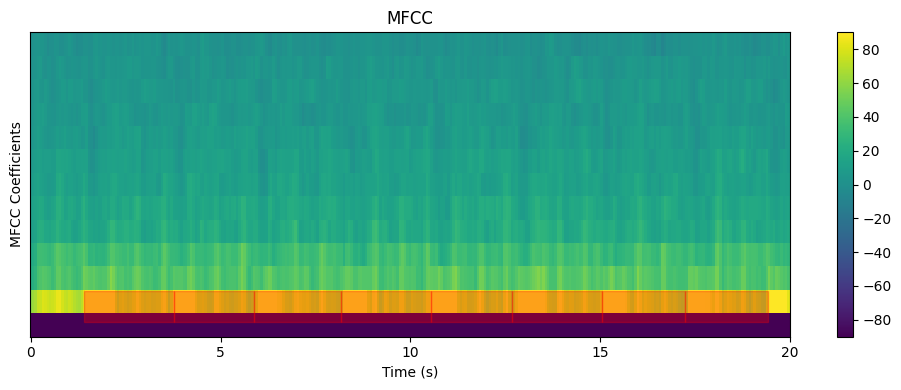

In [37]:
#샘플링 레이트 설정
sr = 8000

#오디오 파일을 로드
audio, sr = librosa.load(audio_file, sr=sr)

#멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=64, fmax=2000)

#멜 스펙트로그램을 디비로 변환한 후 MFCC 계산
hop_length = int(sr/100)
n_fft = int(sr/40)
S_db = librosa.power_to_db(S)
mfccs = librosa.feature.mfcc(S=S_db, sr=sr, n_mfcc=13, hop_length=hop_length, n_fft=n_fft)

#MFCC 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='viridis', vmin=-90, vmax=90)
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()

#바운딩 박스 추가
for entry in data_list:
    start = entry["Beginning of respiratory"]
    end = entry["End of respiratory"]
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles:
        color = 'red'  # crackles만 1일 경우
        ymin = 100/f_max
        ymax = 300/f_max

        plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=0.3)

    if wheezes:
        color = 'blue'  # wheezes만 1일 경우
        ymin = 100/f_max
        ymax = 1800/f_max

        plt.axvspan(start, end, ymin=ymin, ymax=ymax, color=color, alpha=0.3)

plt.show()